In this example, a Q-learning agent navigates a grid world to reach a goal while avoiding obstacles.


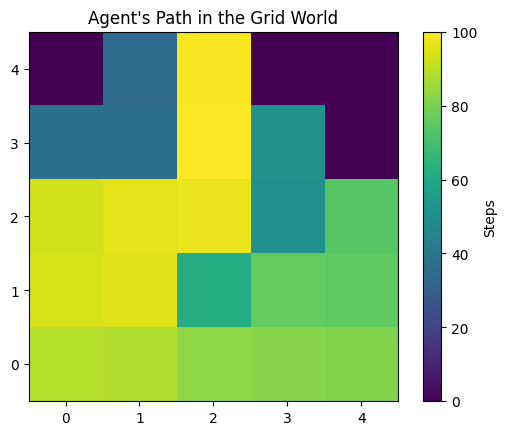

Enter the x-coordinate (0 to 4) for prediction:  2
Enter the y-coordinate (0 to 4) for prediction:  3



Predicted action for (2, 3): 1 (0: up, 1: down, 2: left, 3: right)


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

class QLearningNavigation:
    def __init__(self, grid_size, learning_rate=0.1, discount_factor=0.9, exploration_prob=0.2):
        self.grid_size = grid_size
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_prob = exploration_prob
        self.q_table = np.zeros((grid_size, grid_size, 4)) 

    def update_q_value(self, state, action, reward, next_state):
        current_q_value = self.q_table[state[0], state[1], action]
        best_next_q_value = np.max(self.q_table[next_state[0], next_state[1]])
        new_q_value = (1 - self.learning_rate) * current_q_value + \
                      self.learning_rate * (reward + self.discount_factor * best_next_q_value)
        self.q_table[state[0], state[1], action] = new_q_value

    def choose_action(self, state):
        if np.random.rand() < self.exploration_prob:
            return np.random.choice(4)  
        else:
            return np.argmax(self.q_table[state[0], state[1]])

    def navigate(self, start, goal, obstacles, max_steps=100):
        state = start
        path = [state]

        for _ in range(max_steps):
            action = self.choose_action(state)

           
            if action == 0 and state[0] > 0:
                next_state = (state[0] - 1, state[1])
            elif action == 1 and state[0] < self.grid_size - 1:
                next_state = (state[0] + 1, state[1])
            elif action == 2 and state[1] > 0:
                next_state = (state[0], state[1] - 1)
            elif action == 3 and state[1] < self.grid_size - 1:
                next_state = (state[0], state[1] + 1)
            else:
                next_state = state

           
            reward = -1 
            if next_state == goal:
                reward = 10 
            elif next_state in obstacles:
                reward = -10 

          
            self.update_q_value(state, action, reward, next_state)
            state = next_state
            path.append(state)

         
            if state == goal:
                print("Goal reached!")
                break

        return path


def visualize_path(grid_size, obstacles, path):
    grid = np.zeros((grid_size, grid_size))

    for obstacle in obstacles:
        grid[obstacle[0], obstacle[1]] = -1 

    for step, position in enumerate(path):
        grid[position[0], position[1]] = step

    plt.imshow(grid, cmap='viridis', origin='lower')
    plt.colorbar(label='Steps')
    plt.title('Agent\'s Path in the Grid World')
    plt.show()

# Introduction
display(HTML("<h1 style='color:blue;'>Reinforcement Learning Navigation</h1>"))
print("In this example, a Q-learning agent navigates a grid world to reach a goal while avoiding obstacles.")

# Model Heading
display(HTML("<h2>Model Training and Navigation</h2>"))


grid_size = 5
start = (0, 0)
goal = (4, 4)
obstacles = [(2, 2), (3, 2), (1, 4)]

navigation_model = QLearningNavigation(grid_size)
path = navigation_model.navigate(start, goal, obstacles)


display(HTML("<h2>Visualization of Agent's Path</h2>"))
visualize_path(grid_size, obstacles, path)


display(HTML("<h2>User Input for Prediction</h2>"))
user_input_x = int(input(f"Enter the x-coordinate (0 to {grid_size-1}) for prediction: "))
user_input_y = int(input(f"Enter the y-coordinate (0 to {grid_size-1}) for prediction: "))


if 0 <= user_input_x < grid_size and 0 <= user_input_y < grid_size:
    predicted_action = navigation_model.choose_action((user_input_x, user_input_y))
    print(f"\nPredicted action for ({user_input_x}, {user_input_y}): {predicted_action} (0: up, 1: down, 2: left, 3: right)")
else:
    print("Invalid coordinates. Please enter valid coordinates within the grid size.")
